## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [111]:
import pandas as pd
from pathlib import Path
%matplotlib inline


## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [112]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters

bitstamp_csv_path = Path("/Volumes/Aye's Drive/FinTech/Challenges/Starter_Code3_final/Resources/bitstamp.csv")
bitstamp_df = pd.read_csv(
    bitstamp_csv_path, 
    index_col="Timestamp", 
    infer_datetime_format=True,
    parse_dates=True 
)

bitstamp_df.index.names = ['Date']

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [113]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Date,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:03:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [114]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters

coinbase_csv_path = Path("/Volumes/Aye's Drive/FinTech/Challenges/Starter_Code3_final/Resources/coinbase.csv")

coinbase_df = pd.read_csv(
    coinbase_csv_path,
    index_col = "Timestamp",
    parse_dates = True, 
    infer_datetime_format = True
)

In [115]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
coinbase_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,$430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,$430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,$430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,$430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,$430.96,12.114161,5216.297064,430.595001


In [116]:
coinbase_df.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2019-01-07 17:02:00,4006.01,4006.57,4006.00,$4006.01,3.382954,13553.433078,4006.390309
2019-01-07 17:03:00,4006.01,4006.57,4006.00,$4006.01,0.902164,3614.083169,4006.017233
2019-01-07 17:04:00,4006.01,4006.01,4006.00,$4006.01,1.192123,4775.647308,4006.003635
2019-01-07 17:05:00,4006.01,4006.01,4005.50,$4005.5,2.699700,10814.241898,4005.719991
2019-01-07 17:06:00,4005.51,4006.01,4005.51,$4005.99,1.752778,7021.183546,4005.745614


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [117]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# YOUR CODE HERE

bitstamp_df.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Date,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280
2015-12-31 19:06:00,432.53,432.53,431.48,$432.52,4.117318,1776.650476,431.506725
...,...,...,...,...,...,...,...
2019-01-07 23:54:00,3980.50,3981.00,3980.22,$3980.33,8.043889,32017.759767,3980.383250
2019-01-07 23:55:00,3977.81,3977.81,3977.81,$3977.81,0.008042,31.988752,3977.810000
2019-01-07 23:57:00,3977.81,3984.40,3977.81,$3984.4,8.907403,35464.870894,3981.504964


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [118]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE
bitstamp_df['Close'] = bitstamp_df['Close'].str.replace('$', '')
bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Date,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,430.89,0.143257,61.728095,430.890000
2015-12-31 19:03:00,NaN,NaN,NaN,nan,NaN,NaN,NaN
2015-12-31 19:04:00,430.19,431.06,430.19,431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,430.54,5.558156,2397.461993,431.341280


### Step 3: Convert the data type of the Close column to a `float`.

In [119]:
# Convert the Close data type to a float
# YOUR CODE HERE
bitstamp_df['Close'] = bitstamp_df['Close'].astype(float)

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [120]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE
duplicated_value_bitstamp = bitstamp_df.duplicated()
duplicated_value_bitstamp

Date
2015-12-31 19:01:00    False
2015-12-31 19:02:00    False
2015-12-31 19:03:00    False
2015-12-31 19:04:00    False
2015-12-31 19:05:00    False
                       ...  
2019-01-07 23:55:00    False
2019-01-07 23:56:00     True
2019-01-07 23:57:00    False
2019-01-07 23:58:00    False
2019-01-07 23:59:00    False
Length: 1588619, dtype: bool

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [121]:
# Repeat Steps 1–4 for the coinbase DataFrame

In [122]:
# Step 1, For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame

coinbase_df.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,$430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,$430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,$430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,$430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,$430.96,12.114161,5216.297064,430.595001
...,...,...,...,...,...,...,...
2019-01-07 17:02:00,4006.01,4006.57,4006.00,$4006.01,3.382954,13553.433078,4006.390309
2019-01-07 17:03:00,4006.01,4006.57,4006.00,$4006.01,0.902164,3614.083169,4006.017233
2019-01-07 17:04:00,4006.01,4006.01,4006.00,$4006.01,1.192123,4775.647308,4006.003635


In [123]:
# Step 2, Use the str.replace function to remove the dollar sign, $

coinbase_df['Close'] = coinbase_df['Close'].str.replace('$', '')
coinbase_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,430.96,12.114161,5216.297064,430.595001


In [124]:
# Step 3, Convert the Close data type to a float

coinbase_df['Close'] = coinbase_df['Close'].astype(float)

In [125]:
# Step 4, Review the data for duplicate values, and drop them if necessary

duplicated_value_coinbase = coinbase_df.duplicated()
duplicated_value_coinbase

Timestamp
2015-12-31 19:01:00    False
2015-12-31 19:02:00    False
2015-12-31 19:03:00    False
2015-12-31 19:04:00    False
2015-12-31 19:05:00    False
                       ...  
2019-01-07 17:02:00    False
2019-01-07 17:03:00    False
2019-01-07 17:04:00    False
2019-01-07 17:05:00    False
2019-01-07 17:06:00    False
Length: 1588206, dtype: bool

## Analyze the Data

Your analysis consists of the following steps:

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [126]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
#bitstamp_sliced = # YOUR CODE HERE

# Review the first five rows of the DataFrame

bitstamp_sliced = bitstamp_df.iloc[0:5 , [3]] 
bitstamp_sliced


,Close
Date,
2015-12-31 19:01:00,430.89
2015-12-31 19:02:00,430.89
2015-12-31 19:03:00,NaN
2015-12-31 19:04:00,431.06
2015-12-31 19:05:00,430.54


In [127]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
#coinbase_sliced = # YOUR CODE HERE

# Review the first five rows of the DataFrame
coinbase_sliced = coinbase_df.iloc[0:5 , [3]] 
coinbase_sliced


,Close
Timestamp,
2015-12-31 19:01:00,430.40
2015-12-31 19:02:00,430.40
2015-12-31 19:03:00,430.36
2015-12-31 19:04:00,430.39
2015-12-31 19:05:00,430.96


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [128]:
# Generate the summary statistics for the bitstamp DataFrame
# YOUR CODE HERE

In [129]:
bitstamp_sliced.describe(include='all')

,Close
count,4.000000
mean,430.845000
std,0.218556
min,430.540000
25%,430.802500
50%,430.890000
75%,430.932500
max,431.060000


In [130]:
# Generate the summary statistics for the coinbase DataFrame
# YOUR CODE HERE

In [131]:
coinbase_sliced.describe()

,Close
count,5.000000
mean,430.502000
std,0.256554
min,430.360000
25%,430.390000
50%,430.400000
75%,430.400000
max,430.960000


In [132]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE

<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Date'>

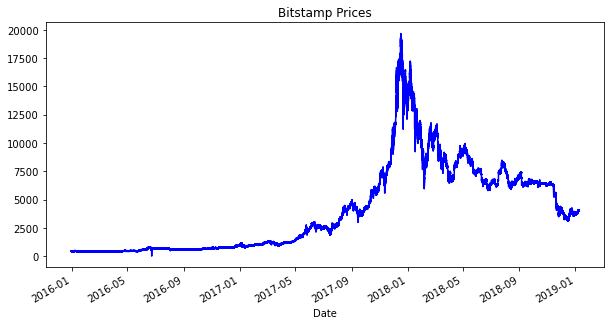

In [133]:
bitstamp_df['Close'].plot(title="Bitstamp Prices", figsize=(10, 5), color="blue")

In [134]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

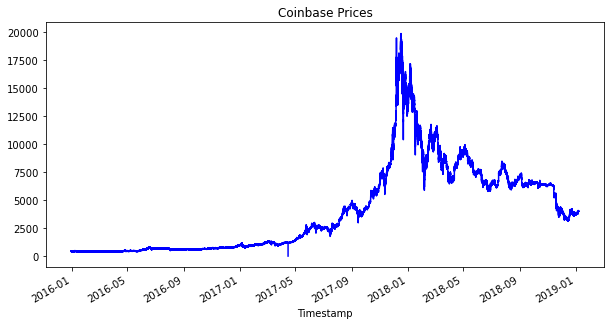

In [135]:
coinbase_df['Close'].plot(title="Coinbase Prices", figsize=(10, 5), color="blue")

In [136]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

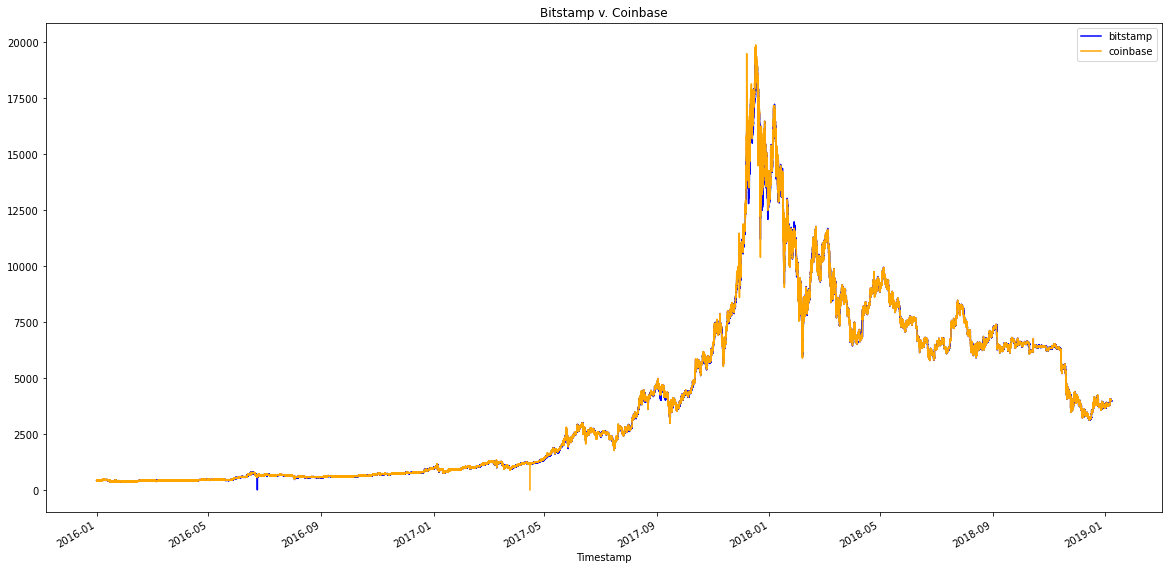

In [137]:
bitstamp_df['Close'].plot(legend=True, figsize=(20, 10), title="Bitstamp v. Coinbase", color="blue", label="bitstamp")
coinbase_df['Close'].plot(legend=True, figsize=(20, 10), color="orange", label="coinbase")

In [138]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

<AxesSubplot:title={'center':'Exchange Comparison (Earlier Time Period)'}, xlabel='Timestamp'>

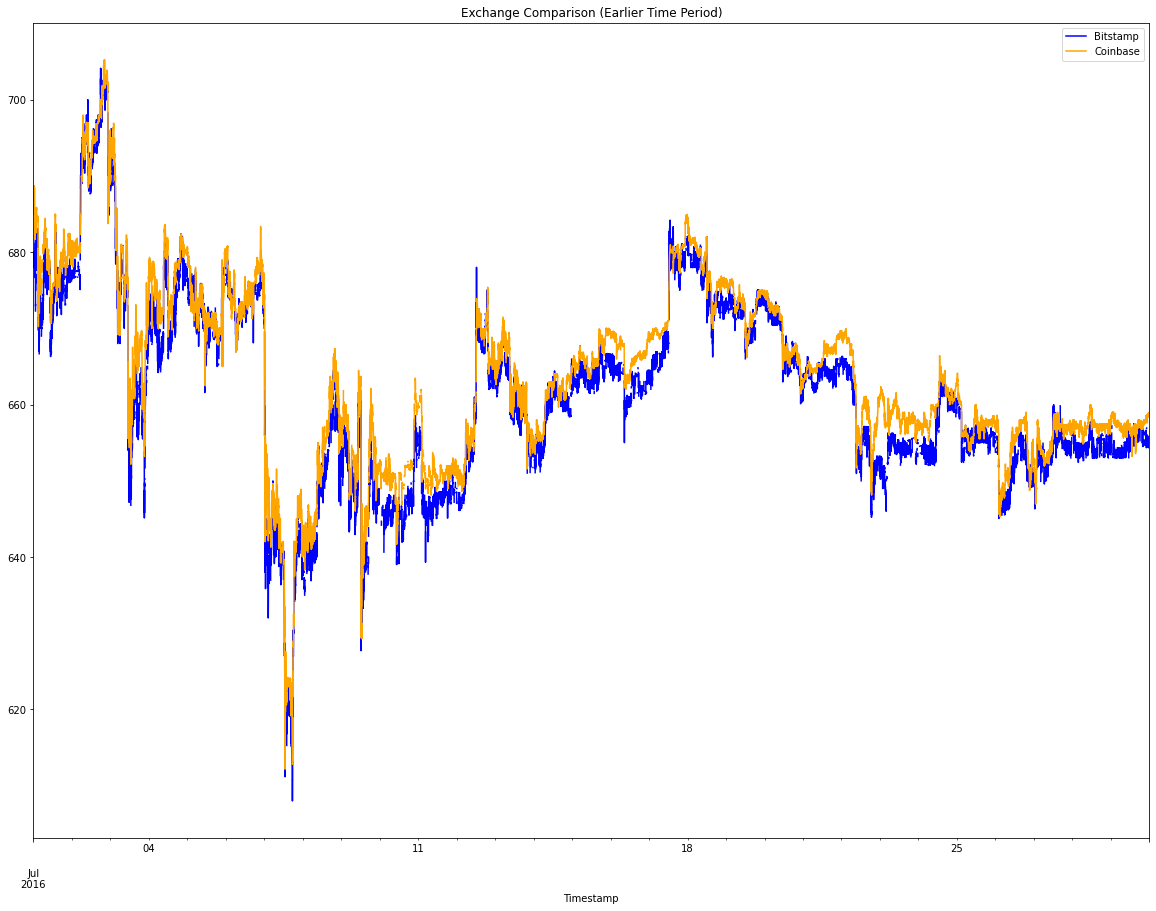

In [139]:
bitstamp_df['Close'].loc['2016-07-01' : '2016-07-29'].plot(
    legend=True, figsize=(20, 15), title="Exchange Comparison (Earlier Time Period)", color="blue", label="Bitstamp")
coinbase_df['Close'].loc['2016-07-01' : '2016-07-29'].plot(
    legend=True, figsize=(20, 15), color="orange", label="Coinbase")

In [140]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE


<AxesSubplot:title={'center':'Exchange Comparison (Later Time Period)'}, xlabel='Timestamp'>

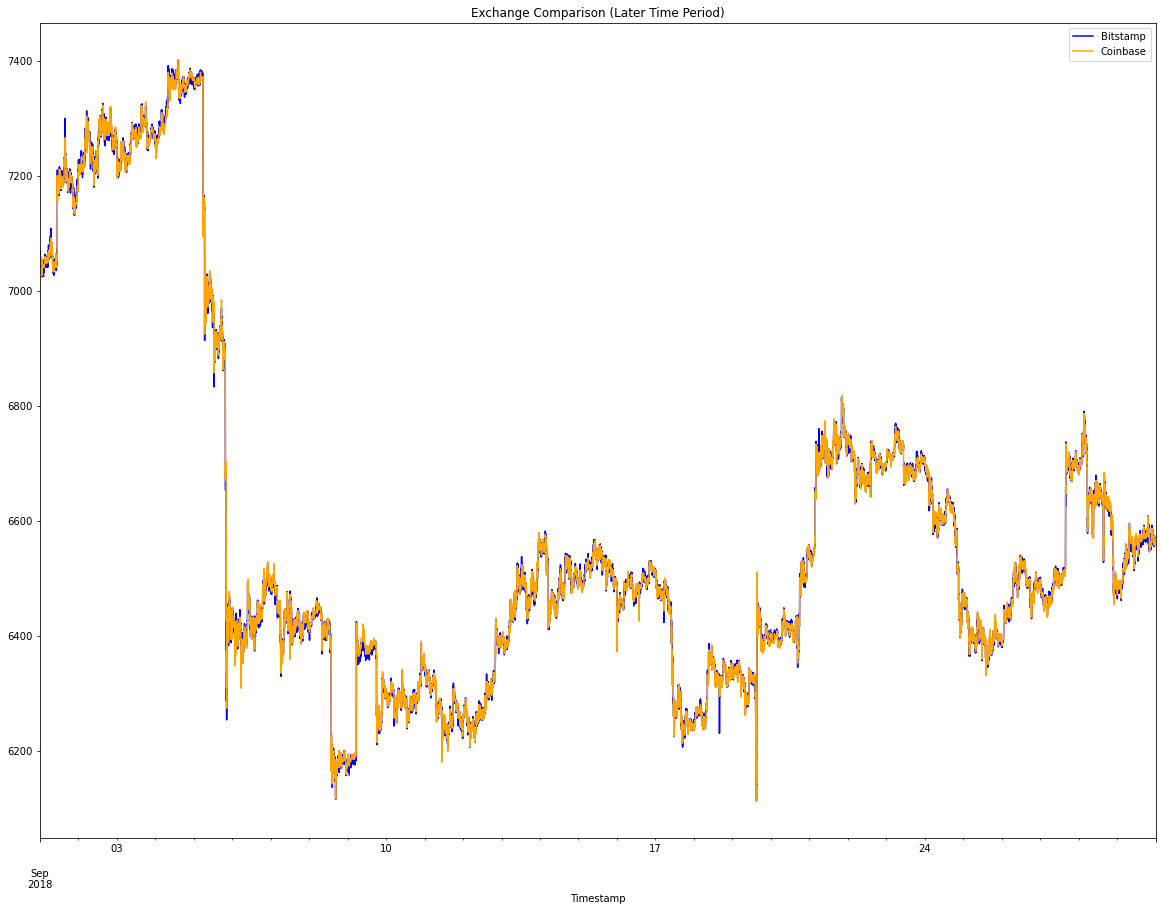

In [141]:
bitstamp_df['Close'].loc['2018-09-01' : '2018-09-29'].plot(
    legend=True, figsize=(20, 15), title="Exchange Comparison (Later Time Period)", color="blue", label="Bitstamp")
coinbase_df['Close'].loc['2018-09-01' : '2018-09-29'].plot(
    legend=True, figsize=(20, 15), color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** # YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the last year of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

In [142]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE


<AxesSubplot:title={'center':'July 22, 2016'}, xlabel='Timestamp'>

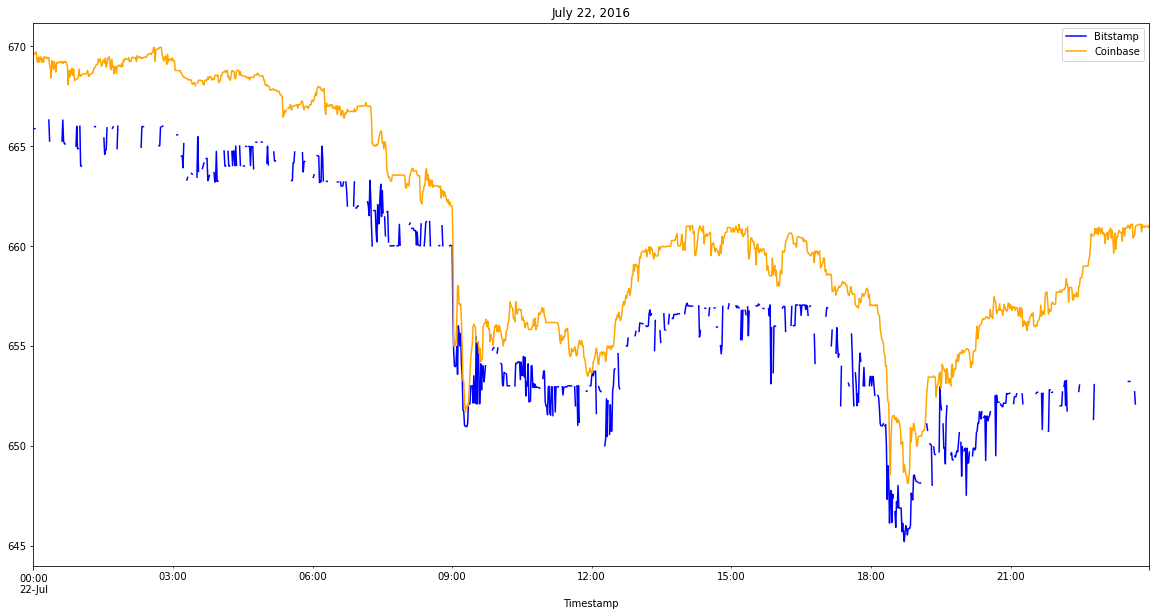

In [143]:
bitstamp_df['Close'].loc['2016-07-22'].plot(
    legend=True, figsize=(20, 10), title="July 22, 2016", color="blue", label="Bitstamp")
coinbase_df['Close'].loc['2016-07-22'].plot(
    legend=True, figsize=(20, 10), color="orange", label="Coinbase")

In [144]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
#arbitrage_spread_early = # YOUR CODE HERE

# Generate summary statistics for the early DataFrame
# YOUR CODE HERE

In [145]:
arbitrage_spread = coinbase_df['Close'].loc['2016-07-22'] - bitstamp_df['Close'].loc['2016-07-22']
arbitrage_spread.describe()

count    812.000000
mean       3.573904
std        1.329960
min       -0.290000
25%        2.820000
50%        3.555000
75%        4.400000
max        9.210000
Name: Close, dtype: float64

In [146]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# Be sure to include at least a title with your plot
# YOUR CODE HERE


<AxesSubplot:>

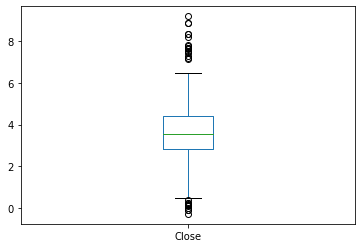

In [147]:
arbitrage_spread.plot(kind='box')

In [148]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE


<AxesSubplot:title={'center':'September 15, 2017'}, xlabel='Timestamp'>

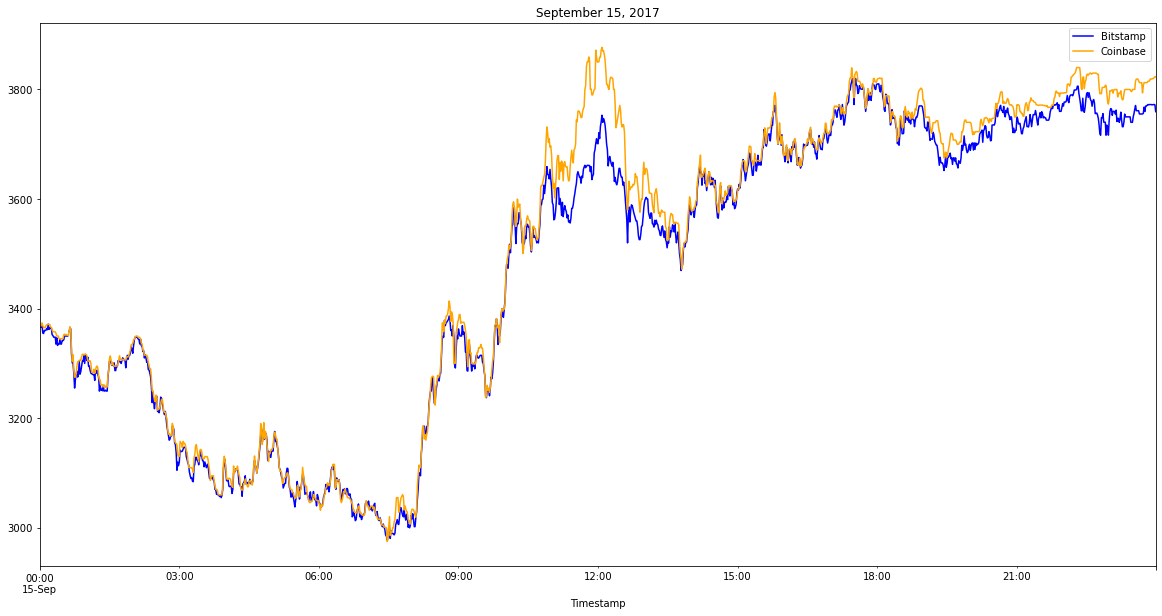

In [149]:
bitstamp_df['Close'].loc['2017-09-15'].plot(
    legend=True, figsize=(20, 10), title="September 15, 2017", color="blue", label="Bitstamp")
coinbase_df['Close'].loc['2017-09-15'].plot(
    legend=True, figsize=(20, 10), color="orange", label="Coinbase")

In [150]:
# Using the date form the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
#arbitrage_spread_middle = # YOUR CODE HERE

# Generate summary statistics for the middle DataFrame
# YOUR CODE HERE


In [151]:
arbitrage_spread = coinbase_df['Close'].loc['2017-09-15'] - bitstamp_df['Close'].loc['2017-09-15']
arbitrage_spread.describe()

count    1439.000000
mean       21.959340
std        31.105196
min       -47.930000
25%         3.215000
50%        12.270000
75%        29.835000
max       198.160000
Name: Close, dtype: float64

In [152]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# Be sure to include at least a title with your plot
# YOUR CODE HERE


<AxesSubplot:>

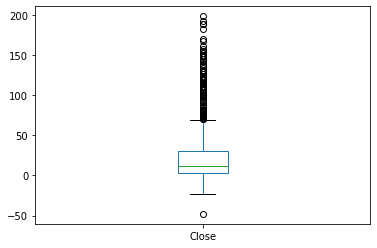

In [153]:
arbitrage_spread.plot(kind='box')

In [154]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE


<AxesSubplot:title={'center':'September 15, 2018'}, xlabel='Timestamp'>

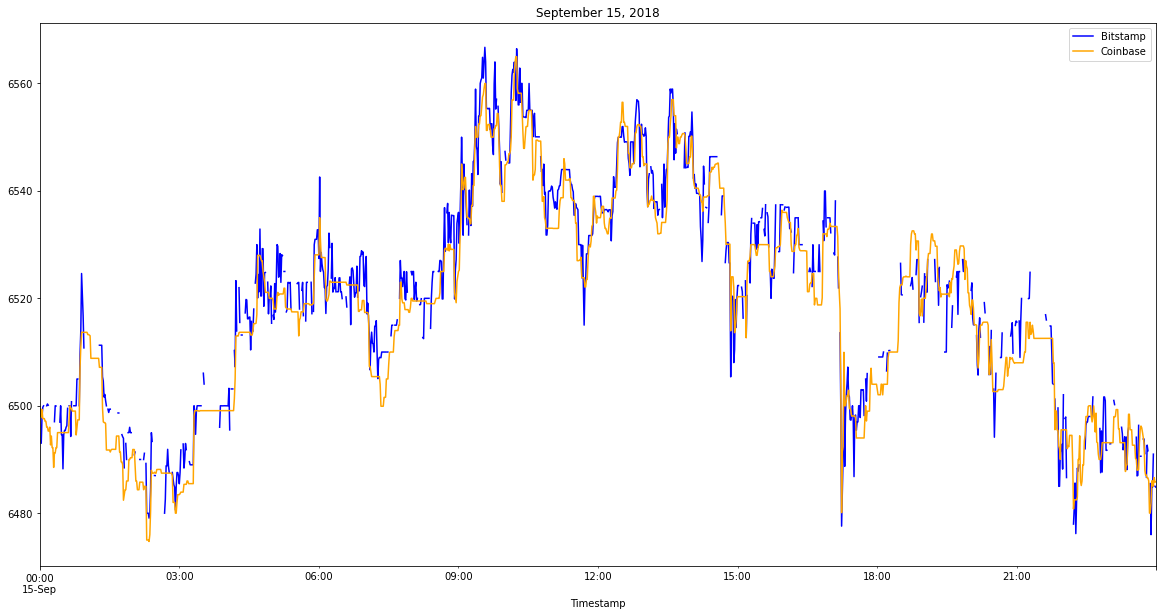

In [155]:
bitstamp_df['Close'].loc['2018-09-15'].plot(
    legend=True, figsize=(20, 10), title="September 15, 2018", color="blue", label="Bitstamp")
coinbase_df['Close'].loc['2018-09-15'].plot(
    legend=True, figsize=(20, 10), color="orange", label="Coinbase")

In [156]:
# Using th date from late in the dataset that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
#arbitrage_spread_late = # YOUR CODE HERE

# Generate summary statistics for the late DataFrame
# YOUR CODE HERE


In [157]:
arbitrage_spread = coinbase_df['Close'].loc['2018-09-15'] - bitstamp_df['Close'].loc['2018-09-15']
arbitrage_spread.describe()

count    1065.000000
mean       -1.891587
std         4.177777
min       -13.010000
25%        -4.840000
50%        -2.040000
75%         0.700000
max        13.980000
Name: Close, dtype: float64

In [158]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# Be sure to include at least a title with your plot
# YOUR CODE HERE


<AxesSubplot:>

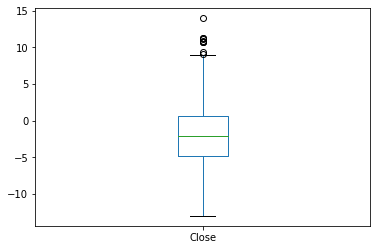

In [159]:
arbitrage_spread.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

In [1]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
#arbitrage_spread_early = # YOUR CODE HERE

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE


In [ ]:
# For the from the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = # YOUR CODE HERE

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE


In [ ]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = # YOUR CODE HERE

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [66]:
# For the date early in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0) by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_early = # YOUR CODE HERE

# Review the spread return DataFrame
# YOUR CODE HERE


Timestamp
2016-07-22 00:01:00    0.005602
2016-07-22 00:02:00    0.005602
2016-07-22 00:08:00    0.006573
2016-07-22 00:11:00    0.004367
2016-07-22 00:14:00    0.004773
Name: Close, dtype: float64

In [ ]:
# For the date in the middle of the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_middle = # YOUR CODE HERE

# Review the spread return DataFrame
# YOUR CODE HERE


In [ ]:
# For the date late in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_late = # YOUR CODE HERE

# Review the spread return DataFrame
# YOUR CODE HERE

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [73]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = # YOUR CODE HERE

# Review the first five profitable trades
# YOUR CODE HERE


Timestamp
2016-07-22 20:03:00    0.011305
2016-07-22 20:28:00    0.011028
2016-07-22 20:41:00    0.011809
2016-07-22 22:47:00    0.014141
2016-07-22 22:48:00    0.011469
Name: Close, dtype: float64

In [ ]:
# For the date in the middle of the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = # YOUR CODE HERE

# Review the first five profitable trades
# YOUR CODE HERE


In [ ]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = # YOUR CODE HERE

# Review the first five profitable trades
# YOUR CODE HERE


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [74]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE


count    18.000000
mean      0.012131
std       0.000936
min       0.010992
25%       0.011484
50%       0.011799
75%       0.012747
max       0.014141
Name: Close, dtype: float64

In [ ]:
# For the date in the middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE


In [ ]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE


#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [75]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = # YOUR CODE HERE

# Drop any missing values from the profit DataFrame
profit_per_trade_early = # YOUR CODE HERE

# View the early profit DataFrame
# YOUR CODE HERE


Timestamp
2016-07-22 20:03:00    7.32
2016-07-22 20:28:00    7.16
2016-07-22 20:41:00    7.67
2016-07-22 22:47:00    9.21
2016-07-22 22:48:00    7.49
2016-07-22 22:50:00    7.43
2016-07-22 22:52:00    7.70
2016-07-22 22:56:00    8.89
2016-07-22 23:08:00    7.53
2016-07-22 23:32:00    7.80
2016-07-22 23:33:00    7.69
2016-07-22 23:34:00    7.65
2016-07-22 23:38:00    7.18
2016-07-22 23:40:00    7.82
2016-07-22 23:41:00    8.89
2016-07-22 23:44:00    8.35
2016-07-22 23:46:00    8.38
2016-07-22 23:58:00    8.23
Name: Close, dtype: float64

In [ ]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = # YOUR CODE HERE

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = # YOUR CODE HERE

# View the early profit DataFrame
# YOUR CODE HERE


In [ ]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = # YOUR CODE HERE

# Drop any missing values from the profit DataFrame
profit_per_trade_late = # YOUR CODE HERE

# View the early profit DataFrame
# YOUR CODE HERE


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [76]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE


count    18.000000
mean      7.910556
std       0.611666
min       7.160000
25%       7.500000
50%       7.695000
75%       8.320000
max       9.210000
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

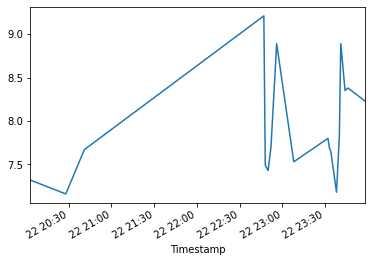

In [79]:
# Plot the results for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
# YOUR CODE HERE


In [ ]:
# Generate the summary statistics for the middle profit per trade DataFrame
# YOUR CODE HERE


In [ ]:
# Plot the results for the middle profit per trade DataFrame
# Be sure to include at least a title with your plot
# YOUR CODE HERE


In [ ]:
# Generate the summary statistics for the late profit per trade DataFrame
# YOUR CODE HERE


In [1]:
# Plot the results for the late profit per trade DataFrame
# Be sure to include at least a title with your plot
# YOUR CODE HERE


#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [80]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE


142.3899999999993

In [ ]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
# YOUR CODE HERE


In [ ]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
# YOUR CODE HERE


#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [81]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = # YOUR CODE HERE


<AxesSubplot:xlabel='Timestamp'>

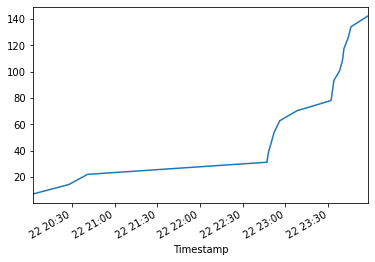

In [83]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
# YOUR CODE HERE

In [ ]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = # YOUR CODE HERE


In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
# YOUR CODE HERE


In [ ]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = # YOUR CODE HERE


In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
# YOUR CODE HERE


**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Arbitrage profits are extremely hard to come by at the market for Bitcoin matures across time. As Bitcoin grows in populatiry, the prices across the two exhanges trade more in line with one another. That makes is very difficult find a point where the price difference exceeds the minimum profit threshold of 1%.